In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# 外部データの読み込み
data = np.loadtxt("test_data",delimiter=",")

In [12]:
# 実データをrベクトルに
r_x = data[:,0] # 列の取り出し
r_y = data[:,1]

In [13]:
# 平均を計算
ave_r_x = np.average(r_x)
ave_r_y = np.average(r_y)

# \begin{equation}
x = r - \bar{r} 
\end{equation}

In [14]:
# rベクトルをxベクトルに変換(原点を中心にする)
x_x = r_x - ave_r_x
x_y = r_y - ave_r_y

## \begin{equation}
\mathbf{V}_{xy} =  \begin{pmatrix}
\sum_{\alpha = 1}^{30} (x_{\alpha} - \bar{x})^2 /30 & \sum_{\alpha = 1}^{30} (x_{\alpha} - \bar{x})(y_{\alpha} - \bar{y}) /30 \\
\sum_{\alpha = 1}^{30} (y_{\alpha} - \bar{y})(x_{\alpha} - \bar{x}) /30  & \sum_{\alpha = 1}^{30} (y_{\alpha} - \bar{y})^2 /30 \\
\end{pmatrix}
\end{equation}

In [15]:
# 分散共分散行列を計算
V = np.zeros((2,2))
V[0][0] = np.dot(x_x, x_x.T) / 30 # ベクトルと転置したベクトルの内積でシグマ計算を実現
V[0][1] = np.dot(x_x, x_y.T) / 30
V[1][0] = np.dot(x_y, x_x.T) / 30
V[1][1] = np.dot(x_y, x_y.T) / 30

# V/30 でもいけそう

# \begin{equation}
U = (u_{1} \  u_{2})
\end{equation}

In [16]:
# 分散共分散行列の固有値,固有ベクトルを計算
la, U = np.linalg.eig(V)

In [17]:
print("ave_r_x:", ave_r_x)
print("ave_r_y:", ave_r_y)
print("V:", V)
print("la:", la)
print("U:", U)

ave_r_x: 158.31
ave_r_y: 59.1933333333
V: [[ 111.3429       41.41373333]
 [  41.41373333   91.25395556]]
la: [ 143.91284706   58.68400849]
U: [[ 0.78603624 -0.61818041]
 [ 0.61818041  0.78603624]]


In [18]:

# グラフに直線を書く準備
u1_x = np.arange(-30,30,1) # -30から30まで1刻みのデータを作成
u1_y = np.arange(-30,30,1)
u2_x = np.arange(-30,30,1)
u2_y = np.arange(-30,30,1)

# 固有ベクトル倍
u1_x = u1_x * U[0][0]
u1_y = u1_y * U[1][0]
u2_x = u2_x * U[0][1]
u2_y = u2_y * U[1][1]

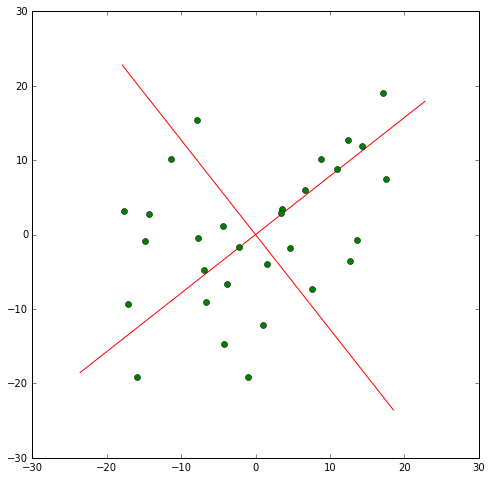

In [34]:
plt.figure(figsize=(8,8)) # グラフの縦横比を8inchで固定
# plt.plot(r_x,r_y,"bo") # 実データを青でプロット
plt.plot(u1_x,u1_y,"-r") # u1を赤でプロット
plt.plot(u2_x,u2_y,"-r") # u2を赤でプロット
plt.plot(x_x, x_y, "go") # 原点移動したデータを緑でプロット

In [20]:
# u1とu2が直交してないっぽく見えたから内積0になるかどうかで確認
u1 = U[:,1]
u2 = U[:,0]
print("np.dot(u1,u2):", np.dot(u1,u2))

np.dot(u1,u2): 0.0


In [21]:
xi= U[0][0] * x_x + U[1][0] * x_y
eta = U[0][1] * x_x + U[1][1] * x_y

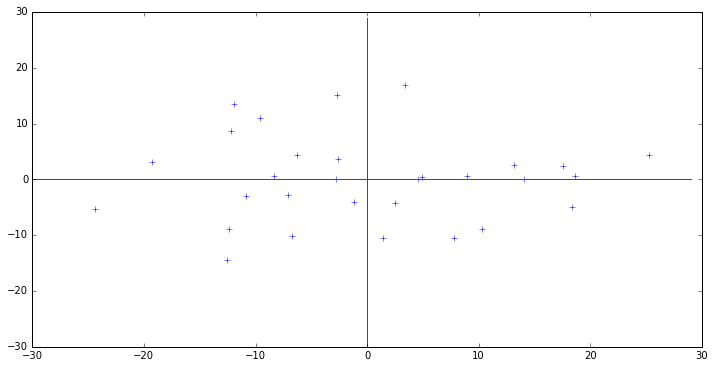

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(xi, eta, "b+")
plt.plot(np.zeros(60), np.arange(-30,30,1) , "-r")
plt.plot(np.arange(-30,30,1), np.zeros(60) , "-r")

In [23]:
print(np.average(xi))
print(np.average(eta))

-6.39488462184e-15
-6.77976193704e-15


In [24]:
V_ = np.zeros((2,2))
V_[0][0] = np.dot(xi, xi.T) / 30
V_[0][1] = np.dot(xi, eta.T) / 30
V_[1][0] = np.dot(eta, xi.T) / 30
V_[1][1] = np.dot(eta, eta.T) / 30
print(V_)

[[  1.43912847e+02   7.07582141e-15]
 [  7.07582141e-15   5.86840085e+01]]


## sklearnを使ってPCA

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, n_components=2, whiten=False)

In [26]:
U = pca.components_.T*-1
print(U)

[[ 0.78603624 -0.61818041]
 [ 0.61818041  0.78603624]]


In [27]:
# グラフに直線を書く準備
u1_x = np.arange(-30,30,1) # -30から30まで1刻みのデータを作成
u1_y = np.arange(-30,30,1)
u2_x = np.arange(-30,30,1)
u2_y = np.arange(-30,30,1)

# 固有ベクトル倍
u1_x = u1_x * U[0][0]
u1_y = u1_y * U[1][0]
u2_x = u2_x * U[0][1]
u2_y = u2_y * U[1][1]

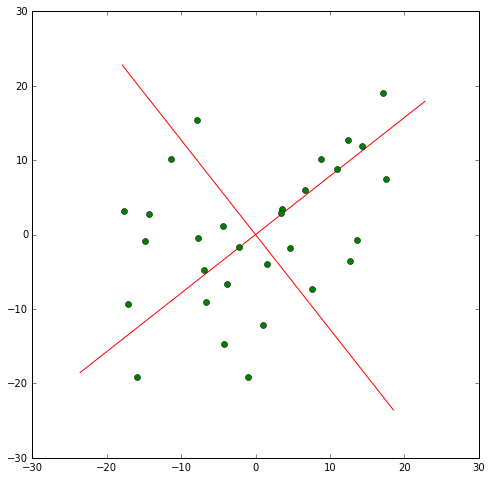

In [28]:
plt.figure(figsize=(8,8)) # グラフの縦横比を8inchで固定
# plt.plot(r_x,r_y,"bo") # 実データを青でプロット
plt.plot(u1_x,u1_y,"-r") # u1を赤でプロット
plt.plot(u2_x,u2_y,"-r") # u2を赤でプロット
plt.plot(x_x, x_y, "go") # 原点移動したデータを緑でプロット

In [29]:
# u1とu2が直交してないっぽく見えたから内積0になるかどうかで確認
u1 = U[:,0]
u2 = U[:,1]
print("np.dot(u1,u2):", np.dot(u1,u2))

np.dot(u1,u2): 0.0


In [30]:
xi = np.dot(u1, [x_x, x_y])
eta = np.dot(u2, [x_x, x_y])

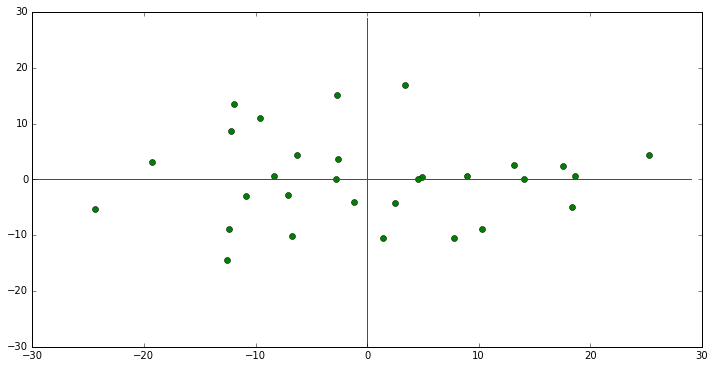

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(xi, eta, "go")
plt.plot(np.zeros(60), np.arange(-30,30,1) , "-r")
plt.plot(np.arange(-30,30,1), np.zeros(60) , "-r")

In [32]:
print(np.average(xi))
print(np.average(eta))

-6.63173220043e-15
-6.66133814775e-15


In [33]:
V_ = np.zeros((2,2))
V_[0][0] = np.dot(xi, xi.T) / 30
V_[0][1] = np.dot(xi, eta.T) / 30
V_[1][0] = np.dot(eta, xi.T) / 30
V_[1][1] = np.dot(eta, eta.T) / 30
print(V_)

[[  1.43912847e+02  -1.29748064e-14]
 [ -1.29748064e-14   5.86840085e+01]]
